# Draw the heatmap of ROI

## Libraries

In [7]:
import pandas as pd
import geopandas as gpd
import os

## Load the showing data

In [8]:
df_data = pd.read_excel('heatmap.xlsx')
df_data.head()

,County,QTY,Total Amount,Percentage
0,North Dublin,2580,108176,0.090151
1,South Dublin,3881,183293,0.152751
2,Dublin,430,26488,0.022074
3,Wicklow,1029,60691,0.050578
4,Wexford,1515,100688,0.083911


## Load the map

<AxesSubplot:>

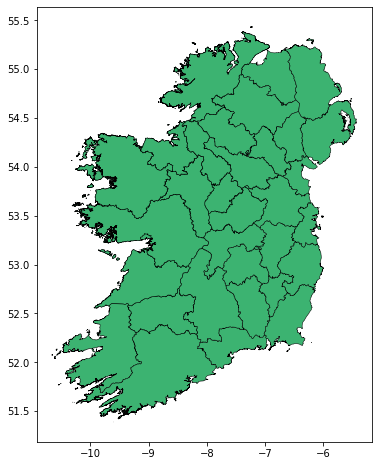

In [9]:
# Read in Ireland and North Ireland map
roi_map = gpd.read_file('./ireland-and-northern-ireland-latest-free/gis_osm_places_a_free_1.shp')

# Extract County
roi_county = roi_map[roi_map['fclass'] == 'county']

# Show the preview
roi_county.plot(figsize=(8, 8), color='mediumseagreen', edgecolor='black', linewidth=0.5)

In [10]:
# Only extract the county name and its geometry
df_county_geo = roi_county.reset_index()
df_county_geo['county'] = [n.replace('County ', '') for n in df_county_geo['name']]
df_county_geo = df_county_geo[['county', 'geometry']]

# Drop duplicate
df_county_geo = df_county_geo.drop_duplicates(subset='county')

# Preview
df_county_geo.head()

,county,geometry
0,Limerick,"POLYGON ((-9.36543 52.57222, -9.35886 52.58140..."
2,Londonderry,"MULTIPOLYGON (((-7.40744 54.96363, -7.40723 54..."
3,Longford,"POLYGON ((-8.03618 53.62842, -8.03617 53.63076..."
5,Roscommon,"POLYGON ((-8.82368 53.66568, -8.82355 53.66576..."
7,Sligo,"MULTIPOLYGON (((-9.13659 54.17777, -9.13652 54..."


## Calculate the data we want

In [11]:
# Save data into dataframe
data_list = [df_data[df_data['County'] == n]['Percentage'].values for n in df_county_geo['county']]
data_list = [n[0] if len(n) == 1 else None for n in data_list]
df_county_geo['data'] = data_list

# Set lable coordinate
df_county_geo['coords'] = df_county_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_county_geo['coords'] = [coords[0] for coords in df_county_geo['coords']]

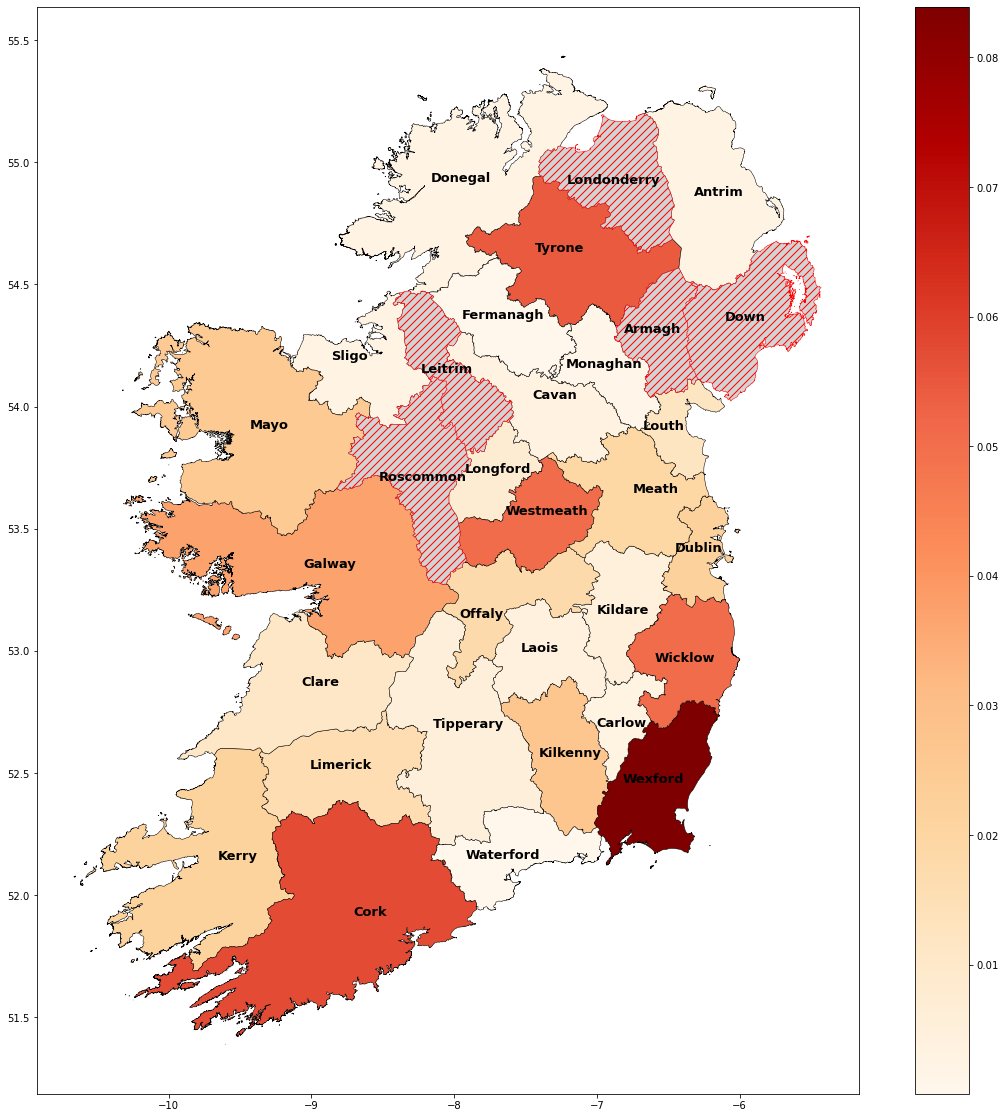

In [20]:
ax = df_county_geo.plot(column='data', 
                        cmap='OrRd', 
                        legend=True, 
                        figsize=(20, 20), 
                        edgecolor='black', 
                        linewidth=0.5, 
                        missing_kwds={"color": "lightgrey", "edgecolor": "red", "hatch": "///", "label": "Missing values"})

# Add labels
for idx, row in df_county_geo.iterrows():
    ax.annotate(text=row['county'], xy=row['coords'],
                 horizontalalignment='center', fontsize=13, weight='bold')

## Save the figure

In [21]:
saving_path = os.getcwd() + '/heatmap_result.jpg'
figure = ax.get_figure()
figure.savefig(saving_path, dpi=300)